<a href="https://colab.research.google.com/github/Manoel-Moreira/Projeto-analise-covid-19-DIO/blob/main/projeto_analise_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto: Criando Modelos com Python e Machine Leraning para prever a evolução da convid-19 no Brasil**
#####  github do projeto - https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/README.md

# Primeiros passos

In [1]:
# Importar as bibliotecas que serão usadas
import numpy as np
import pandas as pd
from datetime import datetime
import plotly.express as px #para visualização
import plotly.graph_objects as go #para visualização



In [2]:
# Pegar os dados do arquivo csv que está no github / Lembre-se de acrescetar ?raw=true
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'


In [ ]:
# a variável df (data frame) foi utilizada  para armazenar os arquivos de dados
df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update']) #parse_dates serve para expecificar que esses dois campos são campos de data
df #Esta linha serve para exibir os dados

In [ ]:
# Conferir os tipos de dados de cada coluna
df.dtypes

# Tratar as colunas do data frame (limpeza)

In [4]:
# Foi importado a biblioteca re para limpar os nomes das colunas. * ver código abaixo as funções utilizadas para a limpeza

import re


In [5]:
# Criando a função corrige_coluna

def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()
#  "[/| ], "",  o código será subsituído por um espao vazio
#.lower () serve para deixar tudo minusculo

In [6]:
#Testando a função corrige_colunas
corrige_colunas("AD/|fF") #Note que ele removeu /| e deixou as letras em minúsculo


'adff'

In [ ]:
#Corrigindo todas as colunas do df
df.columns = [corrige_colunas(col) for col in df.columns] #Criei uma lista para percorrer e corrigir todos os nomes
df

# Selecionar apenas os casos do Brasil.

In [ ]:
 #para filtrar somente os casos que queremos (neste caso, queremos somente os casos do Brasil)
df.loc[df.countryregion == 'Brazil']

# ** Curiosidade **
# Para saber a contagem de casos para cada país, use:
# df.countryregion.value_counts()
# Para saber todos os países que estão no data frame use:
# df.countryregion.unique()

In [ ]:
# Como na coluna confirmed (casos confirmados) existem valores 0.0, vamos filtrar por > 0

brazil = df.loc [(df.countryregion == 'Brazil') & (df.confirmed > 0)] # Neste caso eu quero os casos do Brasil e que estejam maior que 0
brazil

## Casos confirmados

In [ ]:
# Casos confirmados em gráfico:

px.line(brazil, 'observationdate', 'confirmed', title='Casos confirmados no Brasil')

# lembre-se que observationdate = x e confirmed = y
# px vem da bilbioteca plotly.express

In [ ]:
brazil.shape #retorna o número de colunas e linhas

(84, 9)

## Novos casos por dia

In [ ]:
# Primeiro passo criar uma nova coluna que vai receber os novos casos de covid. Para isso, o programa irá observar os dados do dia atual e subtrair do dia anterior (essa coluna será chamada de novos casos)
brazil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brazil['confirmed'].iloc[x] - brazil['confirmed'].iloc[x-1],
    np.arange(brazil.shape[0])))

# * Esta nova coluna irá retornar um aviso, indicando uma maneira mais fácil de fazer o código, mas isso não irá impedir de continuar (pode ser observado na linha abaixo)
# brazil['novoscasos'] -> criar nova coluna
# list -> serve para criar uma lista
# map -> A função map() em Python é usada para aplicar uma função a todos os elementos de um iterável (como listas, tuplas, etc.) e retorna um objeto map, que é um iterador. Esse iterador pode ser convertido para outros tipos de dados, como lista ou tupla, se necessário.
# lambda x: -> criar uma função anonima
# if (x==0) else brazil['confirmed'].iloc[x] - brazil['confirmed'].iloc[x-1] -> se for 0, não faz nada. Se não rertorne o dia atual - o dia interior

# Curiosidade: A parte do código chamada lambda é só uma forma rápida de dizer "faça uma conta simples" para cada dia da planilha. Já o map é o que permite repetir esse cálculo para todas as linhas.

In [12]:
brazil.shape  #retorna o número de colunas e linhas

(84, 9)

In [13]:
# visualizar os dados em um gráfico
px.line(brazil, x='observationdate', y = 'novoscasos', title='Novos casos por dia')

## Mortes

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter (
        x=brazil.observationdate,
        y=brazil.deaths,
        mode='lines+markers',
        name='Mortes',
        line={'color': 'red'}
      )
)

# Layout
fig.update_layout (title = 'Mortes por covid no Brasil')

fig.show()

# Taxa de Crescimento em porcentagem

In [15]:
# Criar uma função para definir a taxa de crescimento

def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    # Definir os valores de inicio e fim
    if data_inicio == None:
      data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
      data_inicio = pd.to_datetime(data_inicio)
    if data_fim == None:
      data_fim = data.observationdate.iloc[-1]
    else:
      data_fim = pd.to_datetime(data_fim)

    # Define os valores do presente e do passado
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]

    # Define o número de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days

    # Calcular a taxa
    taxa = (presente/passado)**(1/n) - 1

    return taxa*100

In [16]:
taxa_crescimento(data=brazil, variable='confirmed')

16.27183353112116

### Explicação do código linha a linha

In [ ]:
'''
 def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    #  Data é o data frame que contém os dados utilizados para o cálculo
    #  Variable é o nome da coluna cujos valores serão utilizados para calcular a taxa de crescimento
    #  data_inicio A data inicial para o cálculo. Se não for fornecida, será determinada automaticamente (por causa do None) - opcional
    #  data_fim A data final para o cálculo. Se não for fornecida, será determinada automaticamente (por causa do None) - opcional
'''
'''
    -- Determinar o valor de ínicio
    if data_inicio == None:
      data_inicio = data.observationdate.loc[data[variable] > 0].min()
      # Verifica se o parâmetro data_inicio foi fornecido: Define data_inicio como a menor data (min()) no DataFrame em que a variável variable tem valores maiores que 0.
    else:
      data_inicio = pd.to_datetime(data_inicio)
      # Caso contrário, Converte o valor fornecido para um formato de data (pd.to_datetime)
'''
'''
    -- Determinar o valor de fim
    if data_fim == None:
      data_fim = data.observationdate.iloc[-1]
      #  Verifica se o parâmetro data_fim foi fornecido: Define data_fim como a última data no DataFrame (iloc[-1]), ou seja, o último elemento da coluna observationdate
    else:
      data_fim = pd.to_datetime(data_fim)
      #  Caso contrário, Converte o valor fornecido para um formato de data (pd.to_datetime)
'''
'''
    -- Define os valores do presente e do passado
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
      # Obtém o valor da variável variable na data inicial (data_inicio).Usa loc para filtrar o DataFrame pela data e acessa o primeiro valor (values[0]).
    presente = data.loc[data.observationdate == data_fim, variable].values[0]
      # Obtém o valor da variável variable na data final (data_fim).
'''
'''
    -- Define o número de dias entra as datas
    n = (data_fim - data_inicio).days
      # Subtrai a data inicial (data_inicio) da data final (data_fim) para obter a diferença em dias e armazena na variável n.
'''
'''
    -- Calcular a taxa de crescimento
    taxa = (presente/passado)**(1/n) - 1
      # Calcula a razão entre o valor final (presente) e o valor inicial (passado).
      # Eleva a razão a 1/n, onde n é o número de dias.
      # Subtrai 1 para obter a taxa de crescimento em termos relativos.
'''
'''
    return taxa*100
      # Multiplica o valor da taxa por 100 para retornar a taxa de crescimento em formato percentual.
  '''


## Taxa de crescimento diário

In [17]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    # Definir os valores de inicio e fim
    if data_inicio == None:
      data_inicio = data.observationdate.loc[data[variable] > 0].min() # valor maior que -- .min() serve para dizer para data]variable pegar o minimo
    else:
      data_inicio = pd.to_datetime(data_inicio)

    data_fim = data.observationdate.max() # a data fim vai ser a última data
       # Define o número de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days

    # Taxa calculada de um dia para o outro
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1], #hoje - ontem / ontem
        range(1, n+1) #fazemos 1 porque precisamos pegar do segundo dia (pq o primeiro dia não tem nada) até o último dia
    ))
    return np.array(taxas) * 100


In [ ]:
tx_dia = taxa_crescimento_diaria(brazil, 'confirmed')
tx_dia

In [19]:
#criar um gráfico
primeiro_dia = brazil.observationdate.loc[brazil.confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia, brazil.observationdate.max())[1:], #[1:] do segundo dia pra frente
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil')

# Predições

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
confirmados = brazil.confirmed
confirmados.index = brazil.observationdate #para pegar as datas
confirmados

In [25]:
res = seasonal_decompose(confirmados)

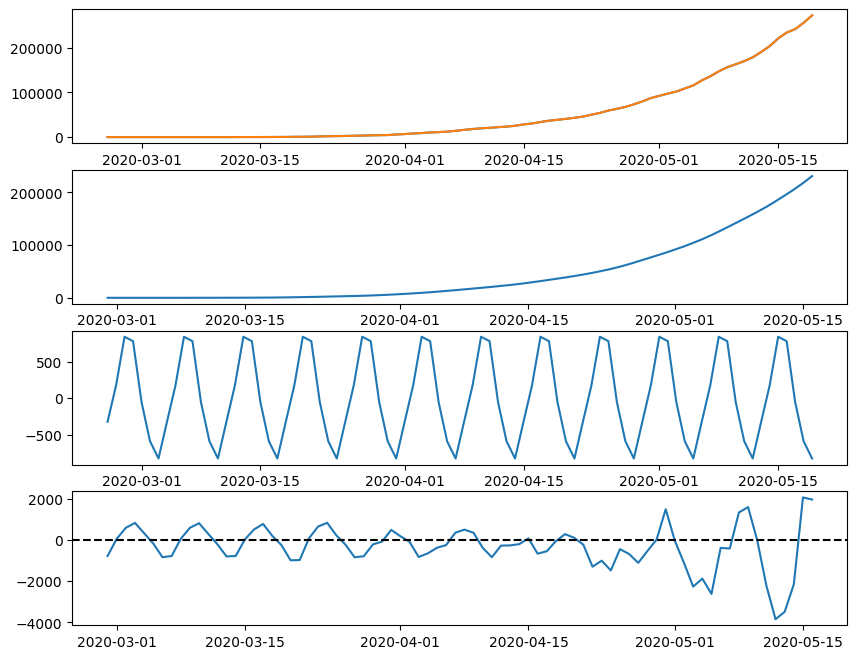

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8)) # Irá gerar 4 figuras (ax1,ax2...) com 4 linhas e 1 coluna e tamanho 10Larg. e 8Altura

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', color='black') #inserido uma linha horizontal para marcar o ponto zero

ax1.plot(res.observed)

In [ ]:
#Iniciar Modelando os dados com a biblioteca Arima